<a href="https://colab.research.google.com/github/EmeraldMath/Tensorflow_models/blob/master/tf_keras_classfication_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

TensorFlow 2.x selected.
2.1.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.5
pandas 0.25.3
sklearn 0.22.1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [0]:
print(np.max(x_train), np.min(x_train))

255 0


In [0]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train" [None, 28, 28] -> [None, 784]
# scaler.fit_transform will record the mean and variance of training data and
# apply them into valida and test data
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
# scaler.transform instead of scaler.fit.transform for valid and test data
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [0]:
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [0]:
# tf.keras.models.Sequential()
'''
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
'''
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: convert vector into prob distribution, x = [x1, x2, x3],
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[]
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [0]:
history = model.fit(x_train_scaled, y_train, epochs=10,
          validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 115us/sample - loss: 0.5272 - accuracy: 0.8158 - val_loss: 0.4143 - val_accuracy: 0.8560
Epoch 2/10
55000/55000 [==============================] - 5s 100us/sample - loss: 0.3882 - accuracy: 0.8612 - val_loss: 0.3795 - val_accuracy: 0.8690
Epoch 3/10
55000/55000 [==============================] - 6s 103us/sample - loss: 0.3521 - accuracy: 0.8725 - val_loss: 0.3558 - val_accuracy: 0.8736
Epoch 4/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.3283 - accuracy: 0.8815 - val_loss: 0.3376 - val_accuracy: 0.8806
Epoch 5/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.3084 - accuracy: 0.8878 - val_loss: 0.3308 - val_accuracy: 0.8826
Epoch 6/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.2926 - accuracy: 0.8940 - val_loss: 0.3216 - val_accuracy: 0.8892
Epoch 7/10
55000/55000 [===========================

In [0]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

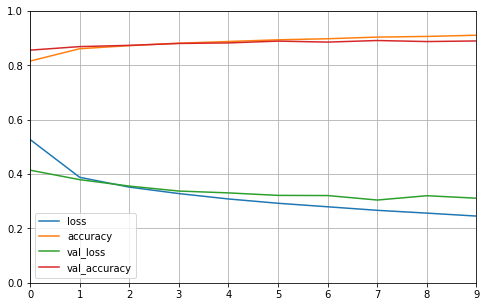

In [0]:
plot_learning_curves(history)

In [0]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.3360 - accuracy: 0.8818


[0.3360253513097763, 0.8818]